<a href="https://colab.research.google.com/github/GaBevilacqua/TextMind_AI/blob/main/An%C3%A1lise_explorat%C3%B3ria_TextMind_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub

# Principais Imports

In [2]:
import pandas as pd
import numpy as np
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter


#NLTK
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter
plt.style.use('ggplot')
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))


#Scipy and Sklearn
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("Historico_de_materias.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Head

In [3]:
df.head()

,data,url_noticia,url_noticia_curto,titulo,conteudo_noticia,assunto
0,2014-01-25,https://web.archive.org/web/20140125123631/htt...,http://g1.globo.com/economia/noticia/2014/01/m...,"Mesmo com alta do dólar, gastos de brasileiros...","\n\tA alta de 15% no dólar em 2013, a maior do...",economia
1,2014-01-25,https://web.archive.org/web/20140125123631/htt...,http://g1.globo.com/economia/noticia/2014/01/p...,"Para Dilma, é 'apressada' a tese de que emerge...",\n\tA presidente Dilma Rousseff afirmou nesta ...,economia
2,2014-01-25,https://web.archive.org/web/20140125123631/htt...,http://g1.globo.com/economia/noticia/2014/01/t...,"Temos sido capazes de reduzir a inflação', diz...","\n\tO presidente do Banco Central, Alexandre T...",economia
3,2014-01-25,https://web.archive.org/web/20140125123631/htt...,http://g1.globo.com/economia/noticia/2014/01/g...,Governo argentino autoriza compra de dólares a...,\n\tO governo argentino anunciou nesta sexta-f...,economia
4,2014-01-25,https://web.archive.org/web/20140125123631/htt...,http://g1.globo.com/economia/noticia/2014/01/p...,Petrobras desiste de parte da área de Bem-te-v...,\n\tA Petrobras afirmou que propôs à Agência N...,economia


# Info

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10109 entries, 0 to 10108
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   data               10105 non-null  object
 1   url_noticia        10109 non-null  object
 2   url_noticia_curto  10109 non-null  object
 3   titulo             10109 non-null  object
 4   conteudo_noticia   10103 non-null  object
 5   assunto            10109 non-null  object
dtypes: object(6)
memory usage: 474.0+ KB
None


# Conteudos nulos

In [ ]:
display(df.isnull().sum())

,0
data,4
url_noticia,0
url_noticia_curto,0
titulo,0
conteudo_noticia,6
assunto,0


# Descrição

In [ ]:
display(df.describe())

,data,url_noticia,url_noticia_curto,titulo,conteudo_noticia,assunto
count,10105,10109,10109,10109,10103,10109
unique,1660,10106,10089,10087,10080,5
top,2019-01-17,https://web.archive.org/web/20141214084651/htt...,http://globoesporte.globo.com/eu-atleta/nutric...,"Receitas da Nanda: cookie, brownie, quibe, pas...",\n\tPreocupado em acrescentar uma pitada de cr...,esportes
freq,21,2,3,3,3,6035


# Inspeção Básica

In [22]:
# Inspeção básica
print(f"Total de matérias: {len(df)}")
print("\nColunas disponíveis:", df.columns.tolist())
print("\nExemplo de uma notícia:")
print(df['conteudo_noticia'].iloc[0][:500] + "...")  # Mostra os primeiros 500 caracteres
# Estatísticas de tamanho
print("\nTamanho médio do conteúdo:", df['tam_conteudo'].mean())
print("Maior título:", df['titulo'][df['tam_titulo'].idxmax()])

Total de matérias: 10081

Colunas disponíveis: ['data', 'url_noticia', 'url_noticia_curto', 'titulo', 'conteudo_noticia', 'assunto', 'ano', 'mes', 'dia_semana', 'tam_titulo', 'tam_conteudo']

Exemplo de uma notícia:

	A alta de 15% no dólar em 2013, a maior dos últimos cinco anos e responsável por encarecer passagens e hotéis cotados em moeda estrangeira, não impediu que os gastos de brasileiros no exterior crescessem e batessem um novo recorde histórico.
	Segundo números divulgados pelo Banco Central nesta sexta-feira (24), as despesas de brasileiros lá fora somaram US$ 25,34 bilhões (considerando a cotação da moeda norte-americana nesta sexta, seriam R$ 61,14 bilhões) em todo o ano passado, o que represen...

Tamanho médio do conteúdo: 2794.3714285714286
Maior título: Para MPF, diálogo mostra que Glenn Greenwald 'auxiliou, orientou e incentivou' hackers; relatório da PF diz que não há evidências de participação


# Tamanho médio do conteudo

In [19]:
df['tam_conteudo'] = df['conteudo_noticia'].apply(len)
print(df['tam_conteudo'].describe())

TypeError: object of type 'float' has no len()

# Remover Duplicadas

In [18]:
df.drop_duplicates(subset=['conteudo_noticia'], inplace=True)

# Distribuição Ano, Mês e Dia da semana

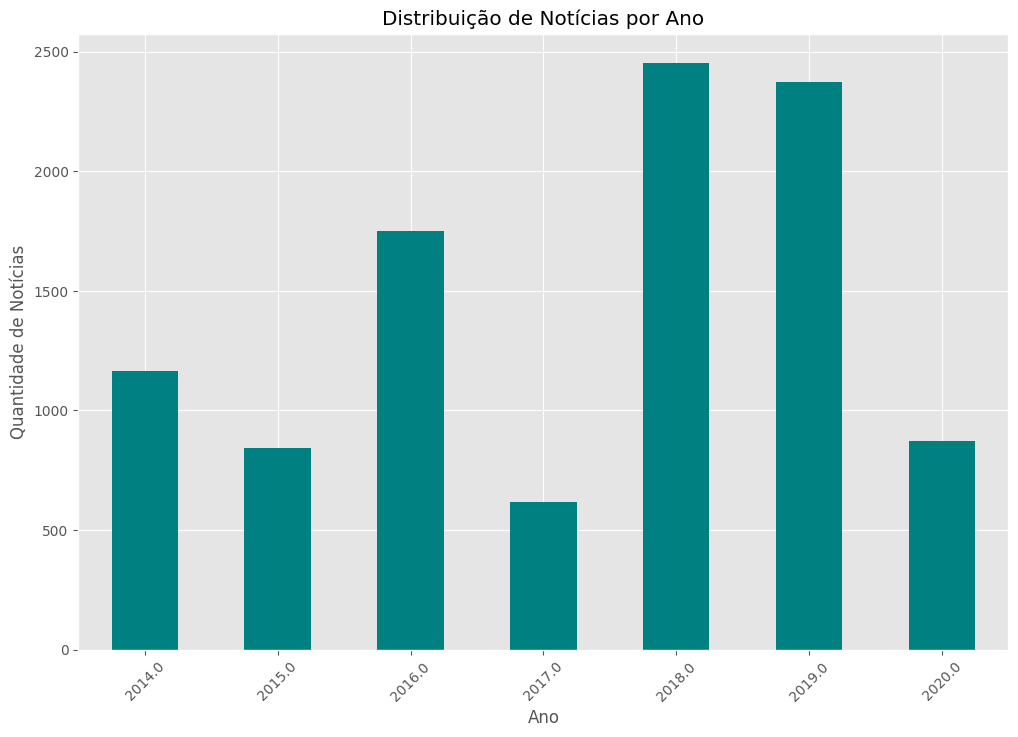

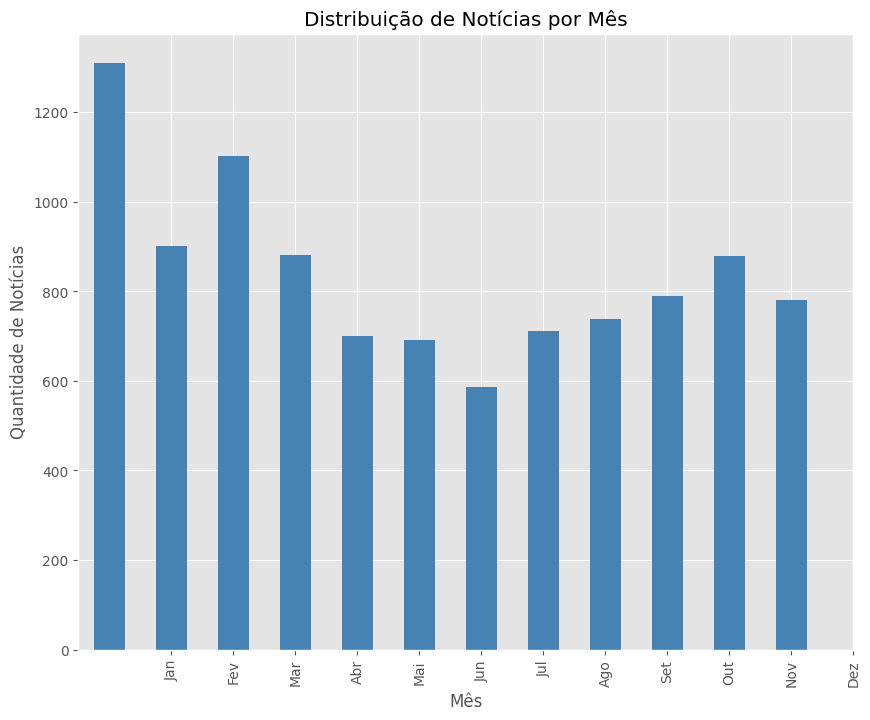

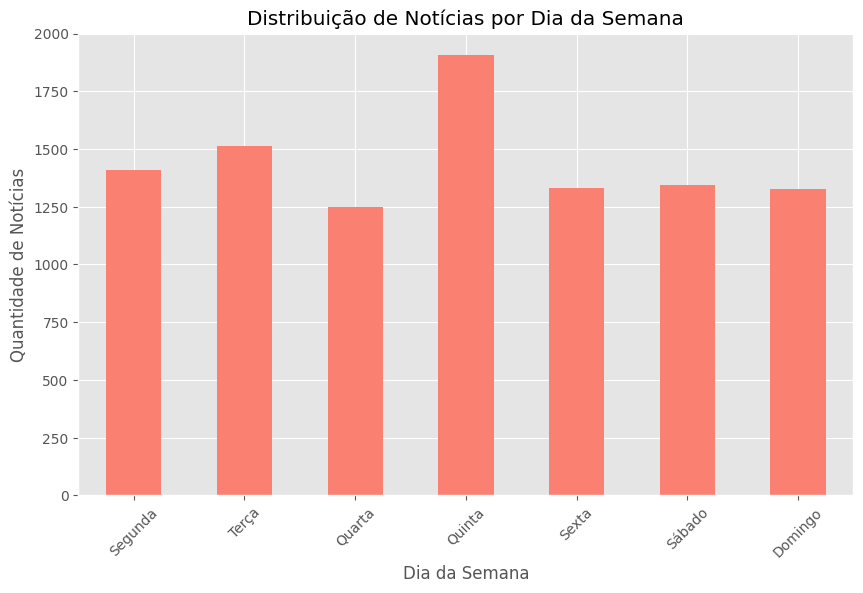

In [21]:
df['data'] = pd.to_datetime(df['data'])
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month
df['dia_semana'] = df['data'].dt.day_name()

dias_traduzidos = {
    'Monday': 'Segunda',
    'Tuesday': 'Terça',
    'Wednesday': 'Quarta',
    'Thursday': 'Quinta',
    'Friday': 'Sexta',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
df['dia_semana'] = df['dia_semana'].map(dias_traduzidos)

# Ano
plt.figure(figsize=(12, 8))
df['ano'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Distribuição de Notícias por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Notícias')
plt.xticks(rotation=45)
plt.show()

# Mês
plt.figure(figsize=(10, 8))
df['mes'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Distribuição de Notícias por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Notícias')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                         'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

# Plotar distribuição por dia da semana (versão mais robusta)
plt.figure(figsize=(10, 6))
dias_ordenados = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

# Criar contagem para todos os dias, mesmo que não existam no dataset
contagem_dias = df['dia_semana'].value_counts()
contagem_dias = contagem_dias.reindex(dias_ordenados, fill_value=0)

contagem_dias.plot(kind='bar', color='salmon')
plt.title('Distribuição de Notícias por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Notícias')
plt.xticks(rotation=45)
plt.show()

# Assuntos

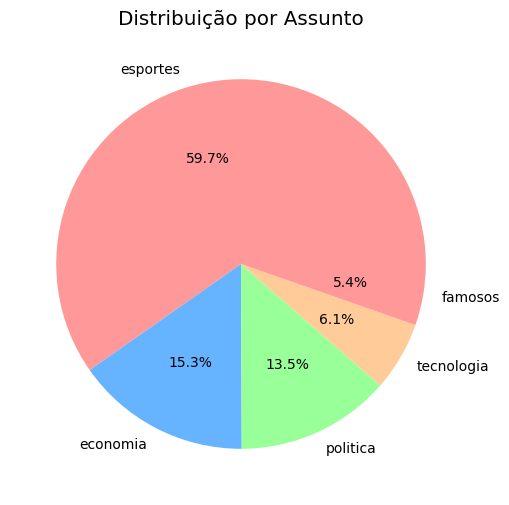

In [20]:
# Assuntos
plt.figure(figsize=(10, 6))
df['assunto'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribuição por Assunto')
plt.ylabel('')
plt.show()



# Evolução por assunto

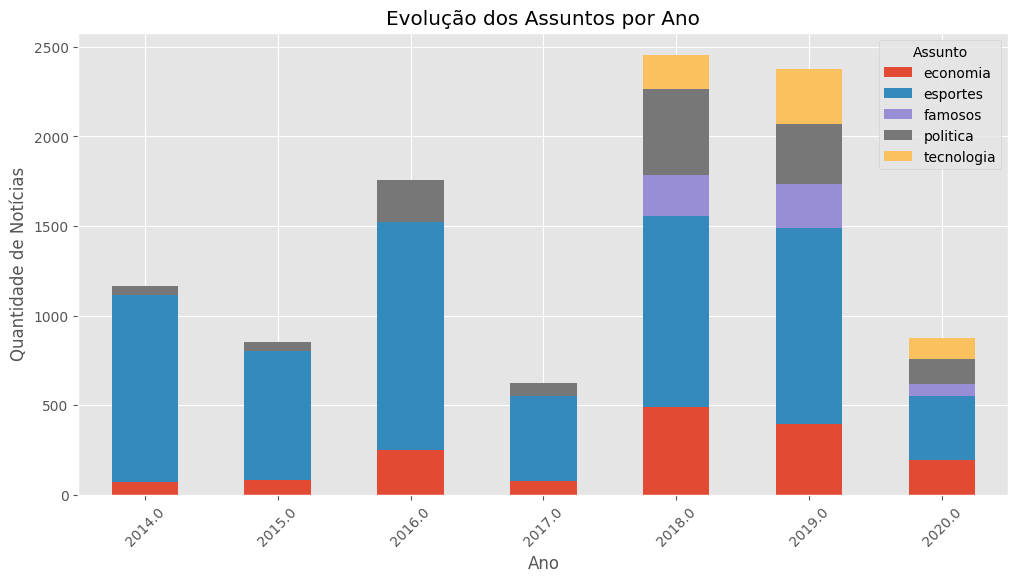

In [10]:
# Evolução dos assuntos ao longo do tempo
assuntos_por_ano = pd.crosstab(df['ano'], df['assunto'])
assuntos_por_ano.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Evolução dos Assuntos por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Notícias')
plt.xticks(rotation=45)
plt.legend(title='Assunto')
plt.show()

# Tamanho Títulos

<ipython-input-12-e47a70179599>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='assunto', y='tam_titulo', data=df, palette='Set2')


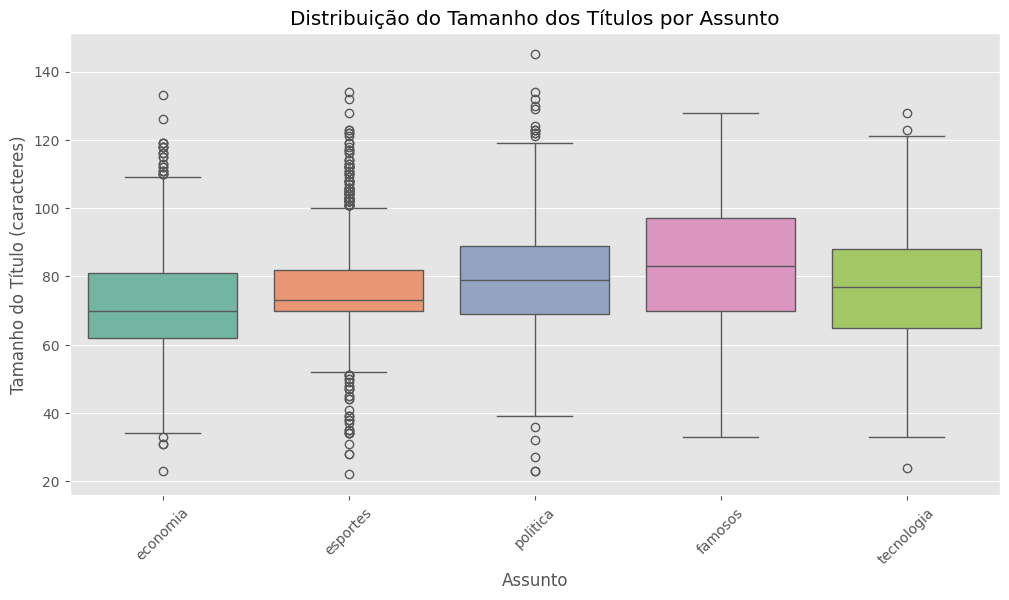

In [12]:
# Tamanho dos títulos e conteúdos
df['tam_titulo'] = df['titulo'].str.len()
df['tam_conteudo'] = df['conteudo_noticia'].str.len()
# Boxplot do tamanho por assunto
plt.figure(figsize=(12, 6))
sns.boxplot(x='assunto', y='tam_titulo', data=df, palette='Set2')
plt.title('Distribuição do Tamanho dos Títulos por Assunto')
plt.xlabel('Assunto')
plt.ylabel('Tamanho do Título (caracteres)')
plt.xticks(rotation=45)
plt.show()



# Tamanho Conteudo

<ipython-input-13-fc3924dba55e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='assunto', y='tam_conteudo', data=df, palette='Pastel1')


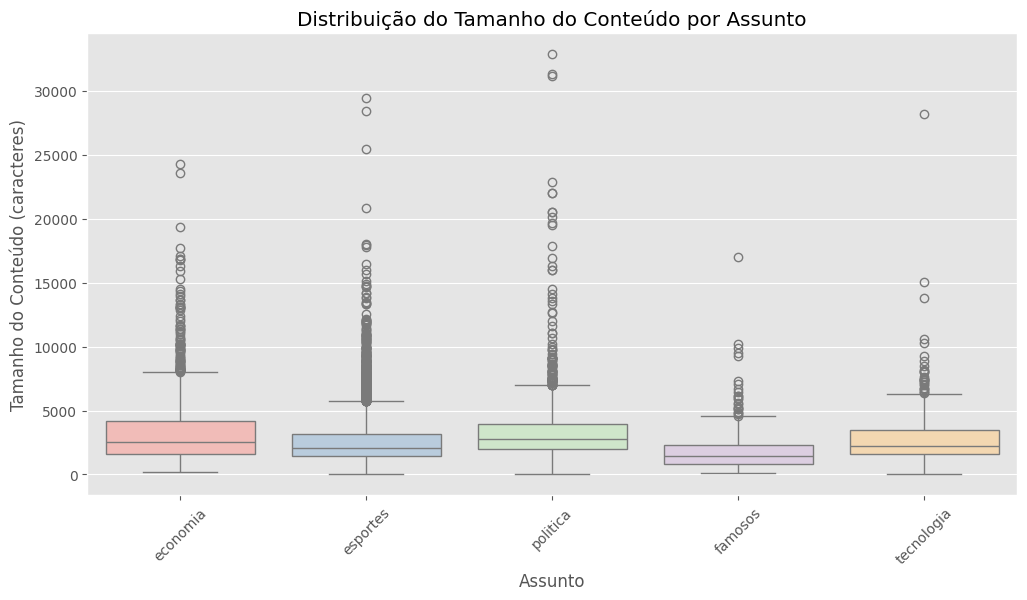

In [13]:
# Tamanho Conteudo
df['tam_titulo'] = df['titulo'].str.len()
df['tam_conteudo'] = df['conteudo_noticia'].str.len()

plt.figure(figsize=(12, 6))
sns.boxplot(x='assunto', y='tam_conteudo', data=df, palette='Pastel1')
plt.title('Distribuição do Tamanho do Conteúdo por Assunto')
plt.xlabel('Assunto')
plt.ylabel('Tamanho do Conteúdo (caracteres)')
plt.xticks(rotation=45)
plt.show()

# Nuvens de Palavras

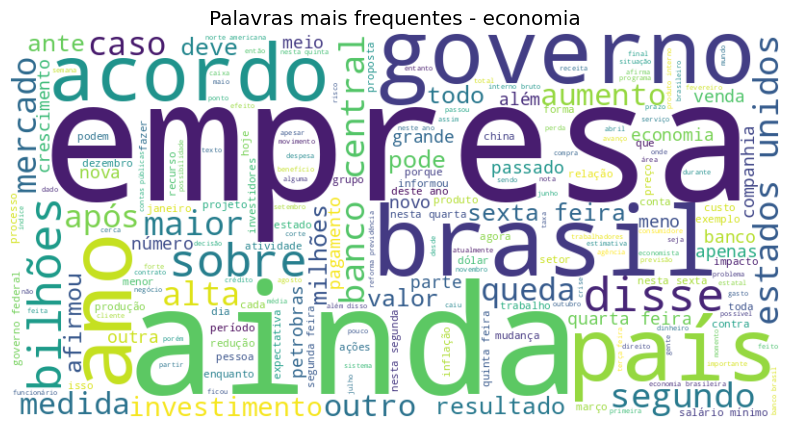

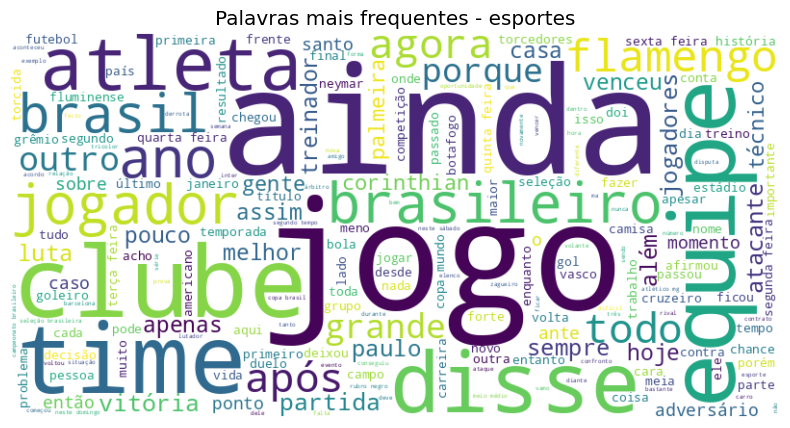

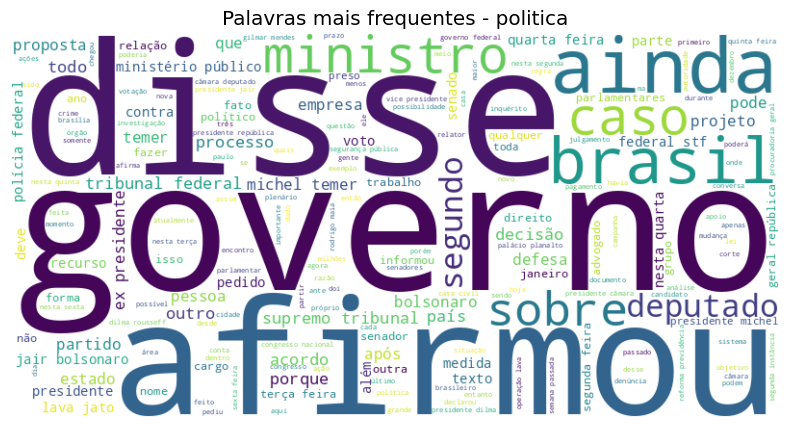

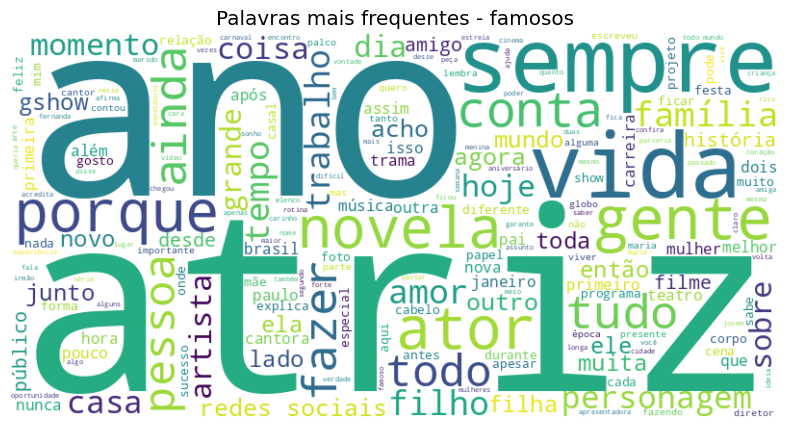

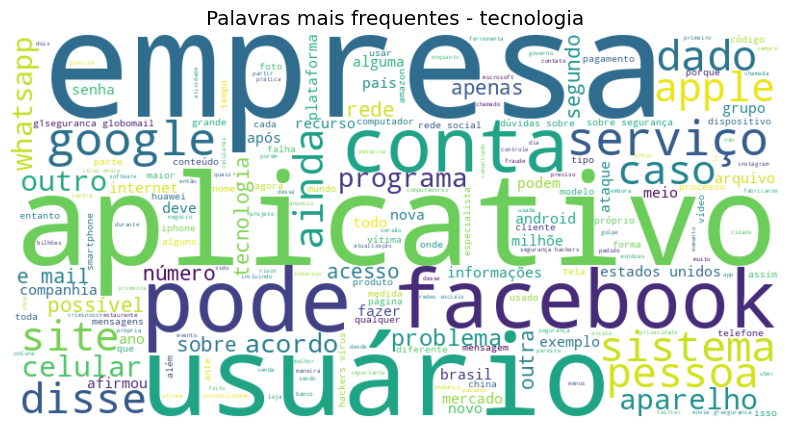

In [ ]:
def clean_text(text):
    words = str(text).lower().split()
    words = [w for w in words if w not in stop_words and len(w) > 3]
    return ' '.join(words)

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Palavras mais frequentes - {title}')
    plt.show()

# Gerar nuvens de palavras para cada assunto
for assunto in df['assunto'].unique():
    textos = df[df['assunto'] == assunto]['conteudo_noticia'].apply(clean_text)
    texto_completo = ' '.join(textos.dropna())
    plot_wordcloud(texto_completo, assunto)